# TITULO
 
*"Trazando el Laberinto de los Libros: Un Análisis Detallado de las Preferencias de Lectura en Kindle"*

## Tema 

"Es un conjunto de datos,  de libros Kindle de Amazon de octubre de 2023, 
que contienen 133102 rows × 16 columns.
Contiene detalles de los libros e información de ventas."

# 1.Introducción

# Hipótesis principales

"Identificar los autores más populares según su número de libros publicados y calificaciones."

"¿La mayoría de los registros pertenecen a novelas, no ficción, ciencia ficción, romance u otros géneros?"

"Determinar la influencia de las etiquetas "Elección destacada" y "Goodreads Choice" en las ventas de libros."

"Titulos más leídos:cuales son los más leídos ¿Hay algunos titulos que se destacan claramente en términos de popularidad?"

"¿Los libros mejor calificados tienden a venderse más?"

El Data se ha obtenido de https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv('C:\\Users\\silvi\\Desktop\\BOOTCAMPS\\datos\\kindle_data-v2.csv')

In [3]:
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [5]:
df.columns

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

# 2.Limpieza y acondicionamiento de los datos

Se traduce el nombre de las columnas para una mejor comprensión

In [6]:
#Traducción del nombre de las columnas para una mejor comprensión
df = pd.read_csv((r'C:\Users\silvi\Desktop\BOOTCAMPS\datos\kindle_data-v2.csv'),
                 names = ['ID de producto', 'Titulo del libro', 'Autor(es) del libro', 
                          'Vendedor(es) del libro','URL de la imagen', 'URL del libro', 'Calificación media',
                          'Número de reseñas', 'Precio del libro','Disponible', 'id de Categoria',
                           'Si es Betsellers','Elección destacada', 'Goodreads Choice',
                           'Fecha de publicación', 'Nombre de la Categoria'],
                header = 0)
df.head(2)

,ID de producto,Titulo del libro,Autor(es) del libro,Vendedor(es) del libro,URL de la imagen,URL del libro,Calificación media,Número de reseñas,Precio del libro,Disponible,id de Categoria,Si es Betsellers,Elección destacada,Goodreads Choice,Fecha de publicación,Nombre de la Categoria
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships


Eliminación de las columnas que no sirven en este caso

In [7]:
#Elimino las columnas que no me van a servir
columnas_a_borrar = ['ID de producto','URL de la imagen', 'URL del libro']
df = df.drop(columnas_a_borrar, axis=1)



In [8]:
df.columns

Index(['Titulo del libro', 'Autor(es) del libro', 'Vendedor(es) del libro',
       'Calificación media', 'Número de reseñas', 'Precio del libro',
       'Disponible', 'id de Categoria', 'Si es Betsellers',
       'Elección destacada', 'Goodreads Choice', 'Fecha de publicación',
       'Nombre de la Categoria'],
      dtype='object')

Verificación y eliminación  de registros duplicados

In [9]:
# Verificar si hay registros duplicados en el DataFrame.

duplicados = df.duplicated()
cantidad_duplicados = duplicados.sum()

# La variable cantidad_duplicados contendrá el número de registros duplicados en el DataFrame.
cantidad_duplicados

1

In [10]:
# Eliminando el registro duplicado
df = df.drop_duplicates()



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133101 entries, 0 to 133101
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Titulo del libro        133101 non-null  object 
 1   Autor(es) del libro     132676 non-null  object 
 2   Vendedor(es) del libro  123868 non-null  object 
 3   Calificación media      133101 non-null  float64
 4   Número de reseñas       133101 non-null  int64  
 5   Precio del libro        133101 non-null  float64
 6   Disponible              133101 non-null  bool   
 7   id de Categoria         133101 non-null  int64  
 8   Si es Betsellers        133101 non-null  bool   
 9   Elección destacada      133101 non-null  bool   
 10  Goodreads Choice        133101 non-null  bool   
 11  Fecha de publicación    84086 non-null   object 
 12  Nombre de la Categoria  133101 non-null  object 
dtypes: bool(4), float64(2), int64(2), object(5)
memory usage: 10.7+ MB


In [12]:
df.describe()

,Calificación media,Número de reseñas,Precio del libro,id de Categoria
count,133101.000000,133101.000000,133101.000000,133101.000000
mean,4.404086,887.382446,15.133920,16.287083
std,0.745647,5104.897374,22.254941,8.416950
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


# 3.Outliers en las variables numéricas

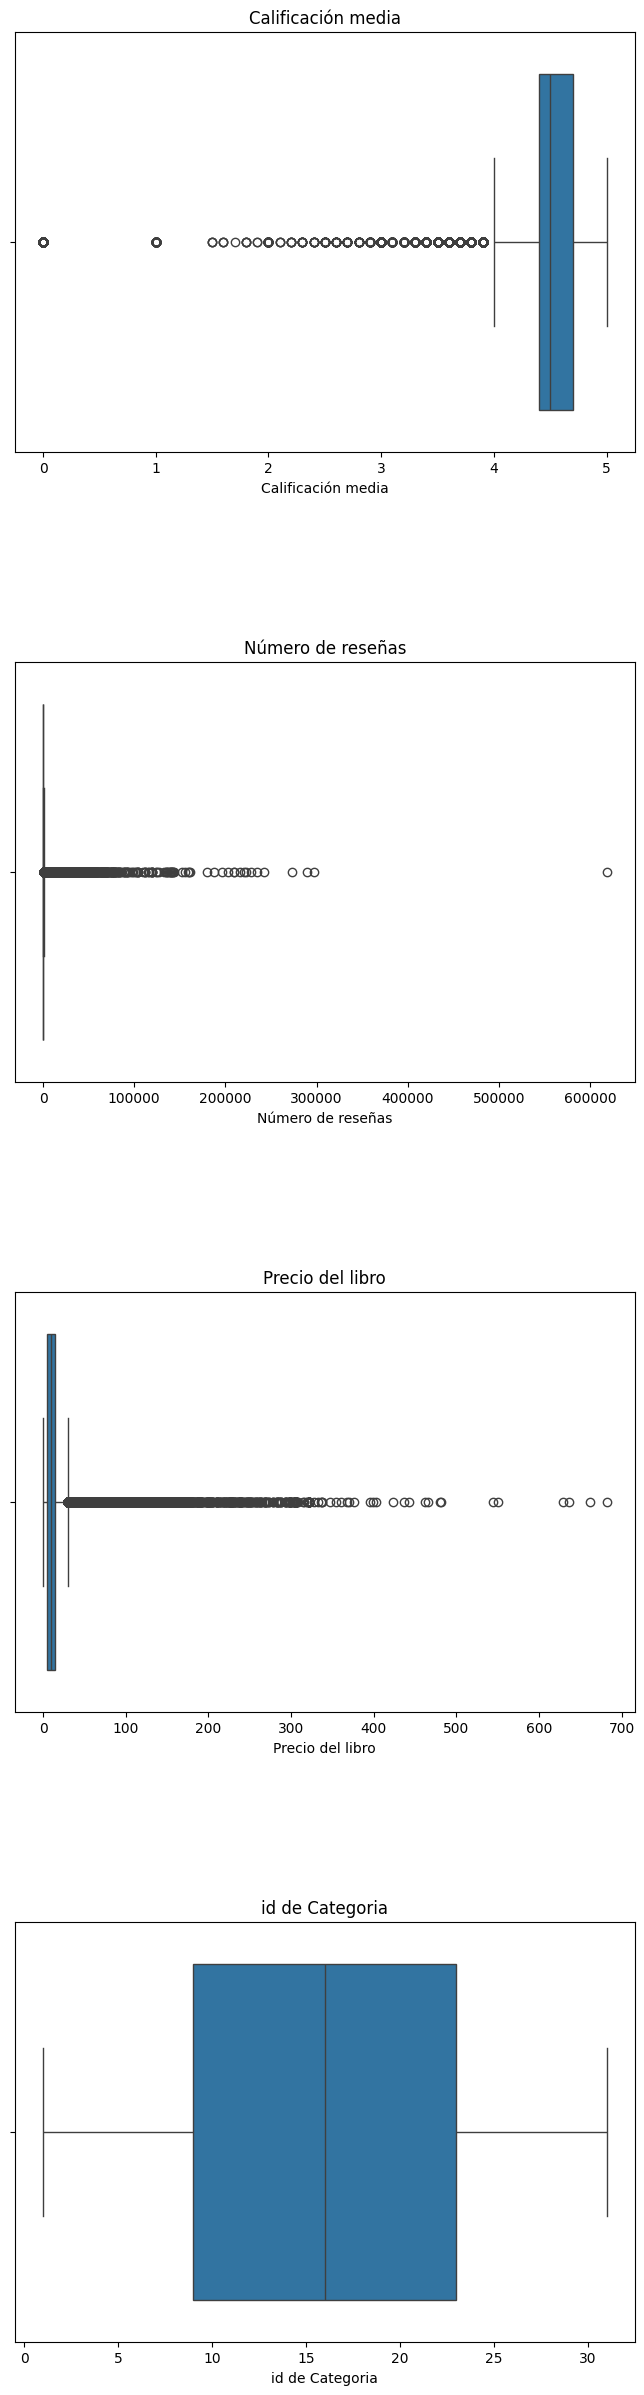

In [13]:
cols_num = ['Calificación media', 'Número de reseñas', 'Precio del libro','id de Categoria']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

# *Observaciones:*

Calificación media contiene muchos 0, que quiere decir que no los han calificado, pero he comprobado, que no altera la media el que los suprima.

Número de reseñas, claramente hay un outlier que destaca en el nº de reseñas, 618227 he comprobado que es un libro muy popular,  se trata de *La chica salvaje (título originalː Where the Crawdads Sing)* del que además hay una película en Netflix, esa puede ser una de las causas, otra sería que,  las reseñas estan recogidas este mes pero pueden ser de lecturas de meses anteriores, en los que  seguramente,  el precio de ebook era bajo o puede que hasta gratis y por eso tiene un número tan alto, en cualquier caso no altera los resultados.

El precio, tiene muchos outliers, he revisado los titulos que tienen un precio más alto y decido quitar los que tienen un precio superior a 450€ ya que,  ni siquiera están disponibles para su adquisición.

Id de categoria contiene 31 categorias.

Calculo de los percentiles

In [14]:
# Lista de columnas para  calcular los percentiles
columnas = ['Calificación media', 'Número de reseñas', 'Precio del libro', 'id de Categoria' ]  

# Diccionario para almacenar los resultados de los percentiles
resultados_percentiles = {}

# Calcular los percentiles para cada columna
for columna in columnas:
    percentiles = {
        'Q0': np.percentile(df[columna], 0),
        'Q25': np.percentile(df[columna], 25),
        'Q50': np.percentile(df[columna], 50),
        'Q75': np.percentile(df[columna], 75),
        'Q100': np.percentile(df[columna], 100)
    }
    
    resultados_percentiles[columna] = percentiles

# Imprimir los resultados
for columna, percentiles in resultados_percentiles.items():
    print(f"Percentiles para '{columna}':")
    print("Q0 (Min):", percentiles['Q0'])
    print("Q25:", percentiles['Q25'])
    print("Q50 (Mediana):", percentiles['Q50'])
    print("Q75:", percentiles['Q75'])
    print("Q100 (Max):", percentiles['Q100'])
    print("Media:", round(df[columna].mean(), 2))
    print()


Percentiles para 'Calificación media':
Q0 (Min): 0.0
Q25: 4.4
Q50 (Mediana): 4.5
Q75: 4.7
Q100 (Max): 5.0
Media: 4.4

Percentiles para 'Número de reseñas':
Q0 (Min): 0.0
Q25: 0.0
Q50 (Mediana): 4.0
Q75: 365.0
Q100 (Max): 618227.0
Media: 887.38

Percentiles para 'Precio del libro':
Q0 (Min): 0.0
Q25: 4.99
Q50 (Mediana): 9.99
Q75: 14.99
Q100 (Max): 682.0
Media: 15.13

Percentiles para 'id de Categoria':
Q0 (Min): 1.0
Q25: 9.0
Q50 (Mediana): 16.0
Q75: 23.0
Q100 (Max): 31.0
Media: 16.29



Se comprueba que el outlier de Calificación media que se corresponde con el 0 no altera los resultados

In [15]:
from scipy import stats

# Calcular la moda con los ceros
modo_con_ceros = stats.mode(df['Calificación media'])

# Imprimir la moda
print("Moda con los ceros:", modo_con_ceros)

# Calcular la moda sin los ceros
modo_sin_ceros = stats.mode(df['Calificación media'][df['Calificación media'] != 0])

# Imprimir la moda sin los ceros
print("Moda sin los ceros:", modo_sin_ceros)

Moda con los ceros: ModeResult(mode=4.6, count=24163)
Moda sin los ceros: ModeResult(mode=4.6, count=24163)


<Axes: xlabel='Calificación media'>

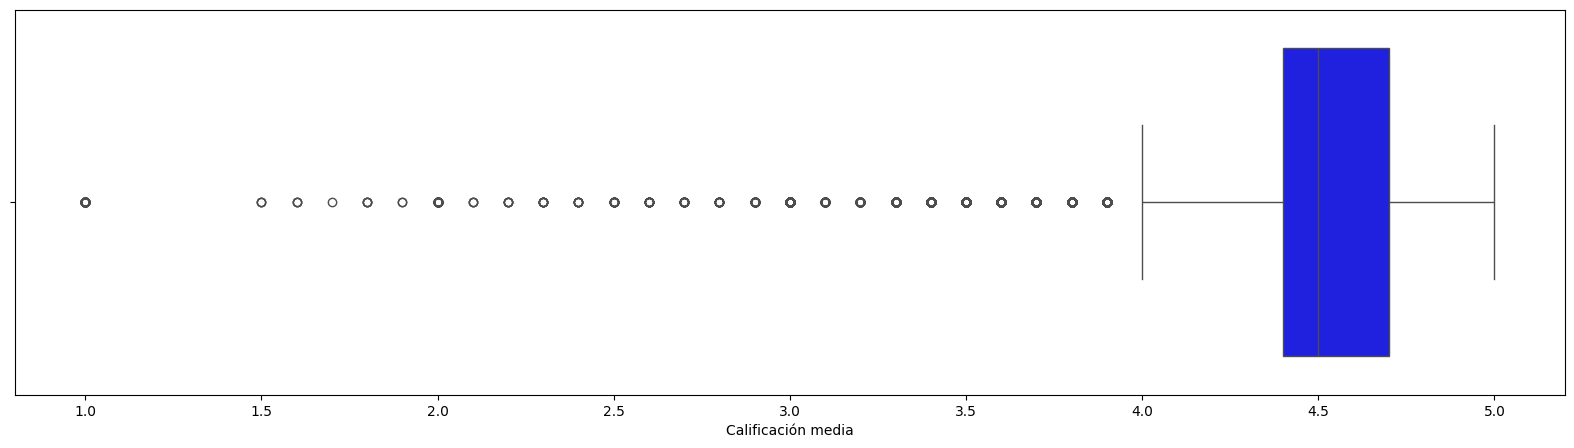

In [16]:
# Fijar el límite inferior del eje y para excluir ceros
plt.figure(figsize=(20, 5))
sns.boxplot(x=df[df['Calificación media'] != 0]['Calificación media'], color="blue")


Se eliminan las filas en las que aparece un precio excesivo 

In [17]:
# Eliminar filas de precio > 450
print(f'Tamaño del set antes de eliminar Precio del libro: {df.shape}')
df['Precio del libro'] = df['Precio del libro'].astype(float)
df = df[df['Precio del libro'] <= 450]
print(f'Tamaño del set después de eliminar Precio del libro: {df.shape}')

Tamaño del set antes de eliminar Precio del libro: (133101, 13)
Tamaño del set después de eliminar Precio del libro: (133091, 13)


Realizo un heatmap de las variables numéricas

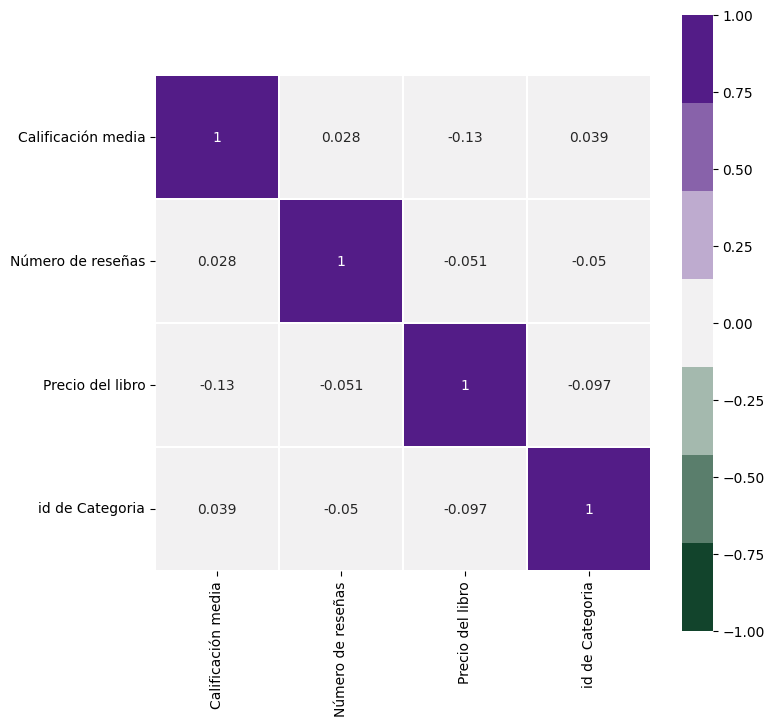

In [18]:
# Selecciona solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,8))
sns.heatmap(df_numeric.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

El valor de correlación entre "Precio del libro" y "Calificación media"con el Id de categoría  es -0.097 y 0.039 respectivamente lo que sugiere que existe una correlación muy débil tanto negativa como positivamente. 

La correlación negativa (-0.097) entre "Precio del libro" e "Id de categoría" podría sugerir que, en promedio, los libros con precios más bajos no tienen mucho que ver con la categoría. Sin embargo, la correlación es muy débil, por lo que esta relación es poco significativa.

La correlación positiva (0.039) entre "Calificación media" e "Id de categoría" sugiere que, en promedio, los libros con calificaciones medias ligeramente más altas tienden a ser de una categoría especifica. Nuevamente, esta correlación es muy débil y no implica una relación fuerte. 

En resumen, los valores de correlación débil como estos indican que no hay una relación sólida o lineal entre las variables  y cualquier relación que exista es mínima.

Se muestran las categorías existentes 

In [19]:
# Contar la cantidad de veces que aparece cada categoría
categoria_counts = df['Nombre de la Categoria'].value_counts().reset_index()
categoria_counts.columns = ['Categoría', 'Cantidad']

# Crear el gráfico de barras
fig = px.bar(categoria_counts, x='Categoría', y='Cantidad', text='Cantidad')

fig.update_layout(title='Categorías Existentes y Sus Cantidades',
                  xaxis_title='Categoría', yaxis_title='Cantidad',
                  showlegend=False)

fig.show()


Comparación del Precio del libro con la Calificación media

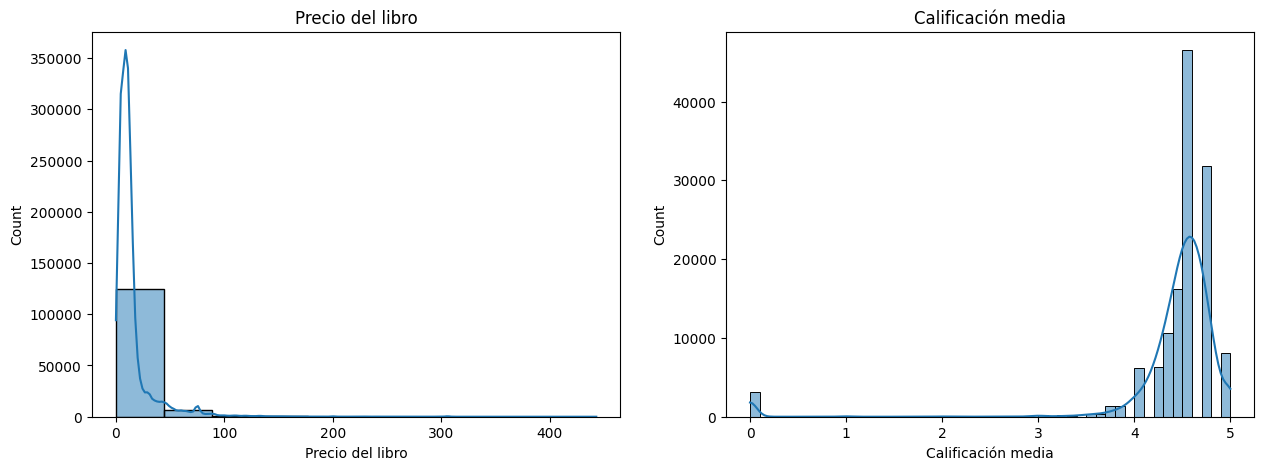

In [20]:

# Dibujar histogramas de comparación del precio del libro con la calificación media
col_num = ['Precio del libro', 'Calificación media']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Precio del libro':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

## Observaciones:

La mayor parte de los precios oscilan entre los 9.99€ y los 14.99€

La calificación media es de 4.5

# 4.Variables categóricas

A pesar de tener diferentes tipos de letras en algunos casos, no hay ni categorias, ni años, ni vendedores, que esten con el mismo nombre escrito diferente.

Se procede a mostrar gráficamente una pequeña muestra, para una primera impresión

C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\2210463912.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\2210463912.py:15: UserWarning:


The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.

C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\2210463912.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\2210463912.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\2210463912.py:15: UserWarning:

The palette list 

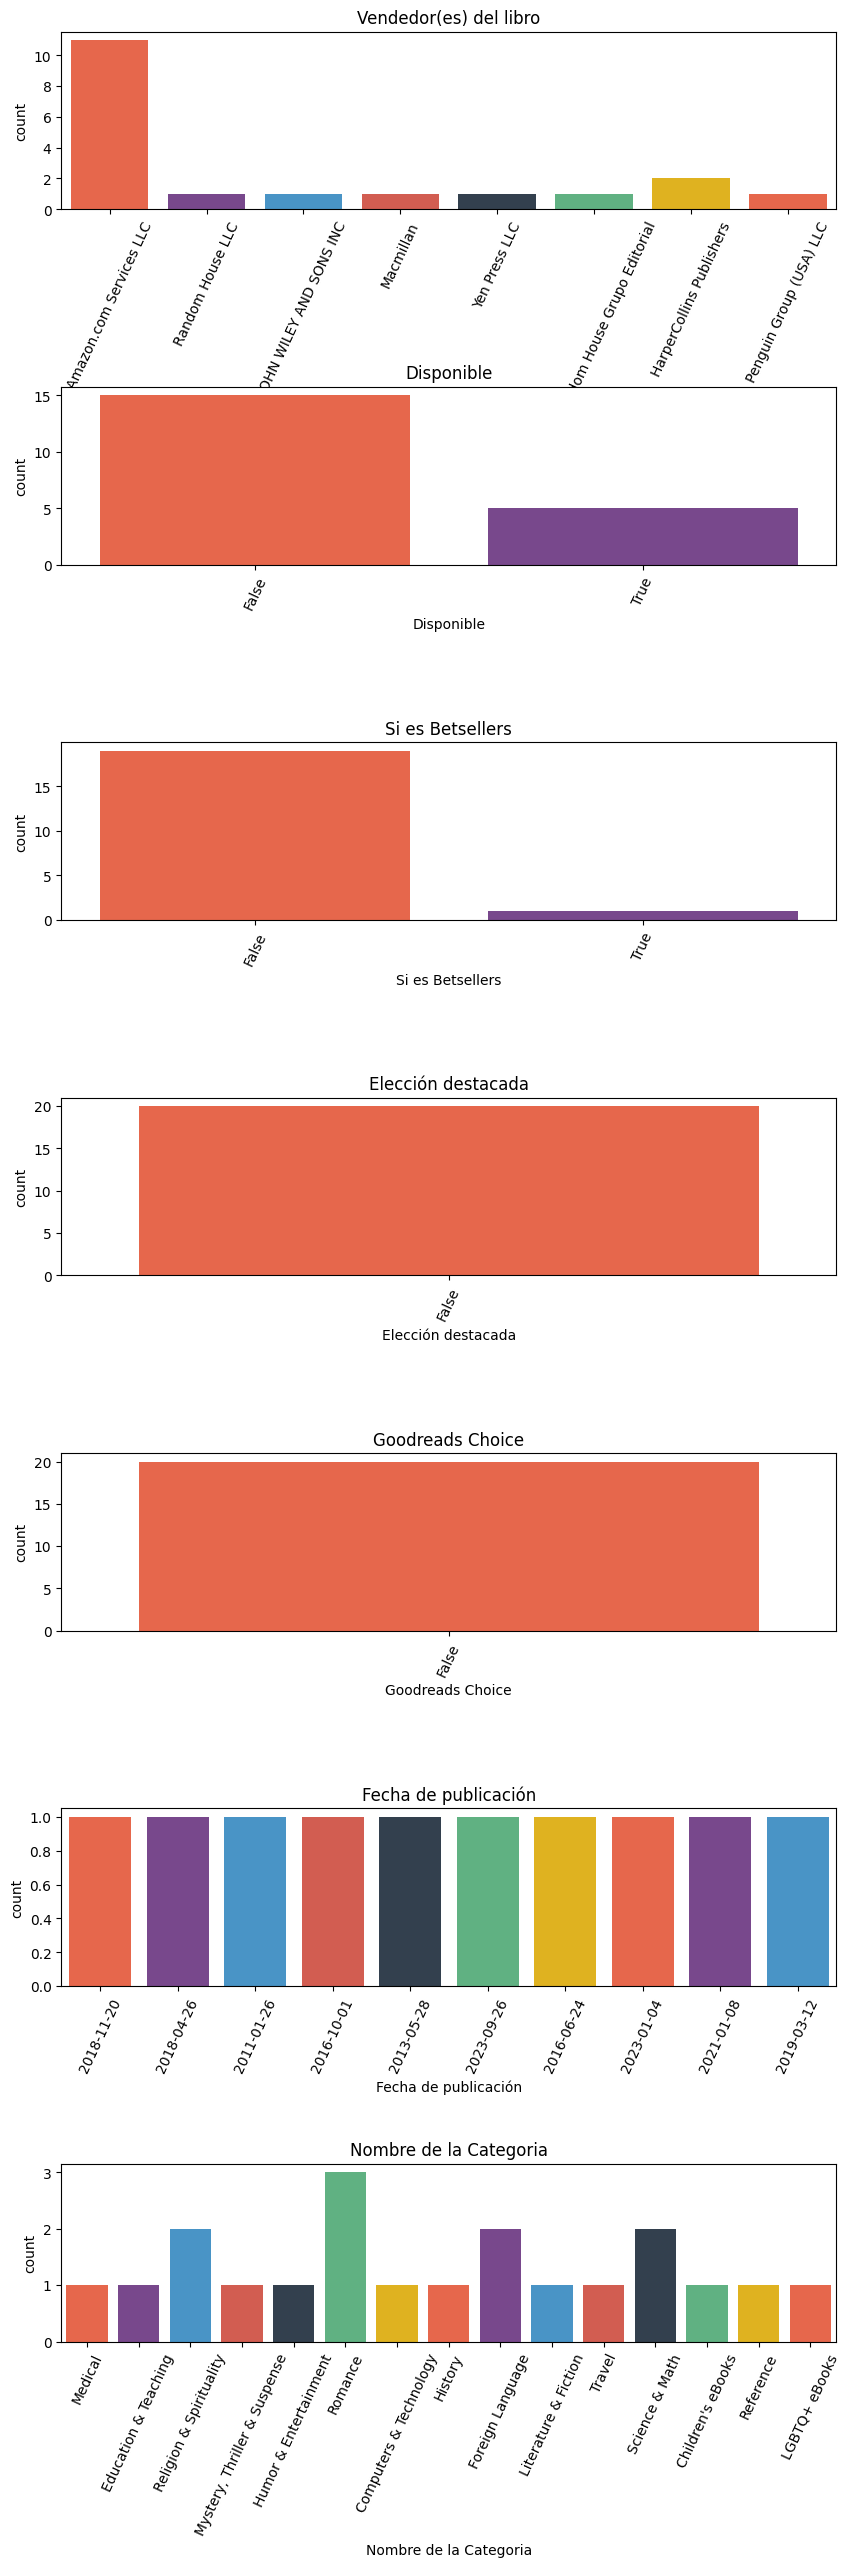

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_cat = ['Vendedor(es) del libro', 'Disponible', 'Si es Betsellers', 'Elección destacada', 'Goodreads Choice', 'Fecha de publicación', 'Nombre de la Categoria']

sampled_df = df.sample(n=20, random_state=42)

# Define una paleta de colores personalizada
colores_personalizados = ["#FF5733", "#7D3C98", "#3498DB", "#E74C3C", "#2E4053", "#52BE80", "#FFC300"]

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=sampled_df, ax=ax[i], palette=colores_personalizados)
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=65)

plt.show()


In [22]:
import plotly.express as px
import seaborn as sns

col_cat = ['Autor(es) del libro','Titulo del libro' ]
# Seleccionar una muestra aleatoria de 5 registros
sampled_df = df.sample(n=5, random_state=42)

# Crear un gráfico interactivo utilizando Plotly
fig = px.bar(sampled_df, x=col_cat[0], title=col_cat[0], text='Titulo del libro' )
fig.update_xaxes(tickangle=75)
fig.update_layout(height=400, width=600)

# Mostrar el gráfico interactivo
fig.show()


## Primeras Observaciones de la muestra:

En titulo y autor, la mayoría son únicos, aunque hay algun escritor que tiene varios libros, en esta pequeña muestra solo salen los correspondientes a escritores aleatorios que no se repiten.

Como vendedores destaca Amazon por mucha diferencia.

Disponible depende un poco de la muestra aleatoria.

Si es Best Seller, también depende de la muestra, pero aquí no parece que sea una condición para su compra.

Tanto Elección destacada como Goodreads Choice contienen altos valores de False, da a entender que tienen muy poca relación con la intención de los lectores, aunque como la muestra es pequeña puede no ser real.

La fecha de publicación, no tiene influencia, en este muestreo salen diferentes años, en el total, la mayoría pertenecen al año 2019 en adelante, el máximo  a 2023.

En cambio en la Categoría,  si se puede apreciar que existen diferencias sustanciales en cuanto a preferencias.

# 5.HIPOTESIS

*"Identificar los autores más populares según su número de libros publicados y calificaciones."*

In [23]:
autores_libros = df.groupby('Autor(es) del libro')['Titulo del libro'].count()
autores_calificacion_media = df.groupby('Autor(es) del libro')['Calificación media'].mean()
# Ordenar por número de libros en orden descendente
autores_libros = autores_libros.sort_values(ascending=False)

# Ordenar por calificación media en orden descendente 
autores_calificacion_media = autores_calificacion_media.sort_values(ascending=False)

# Mostrar los autores con más libros
print("Autores más populares por número de libros:")
print(autores_libros.head(10))

# Mostrar los autores con la calificación media más alta 
print("Autores con la calificación media más alta:")
print(autores_calificacion_media.head(10))

Autores más populares por número de libros:
Autor(es) del libro
James Patterson          212
DK Eyewitness            163
DK                       155
Captivating History      120
Fodor's Travel Guides    115
Erin Hunter              114
J.K. Rowling             113
Hourly History           103
Nora Roberts              99
Stephen King              99
Name: Titulo del libro, dtype: int64
Autores con la calificación media más alta:
Autor(es) del libro
（明） 蘭陵笑笑生              5.0
Linda Katehi           5.0
Caroline Nelson        5.0
Linda Nielsen          5.0
Linda Parker           5.0
Linda Thomas-Mobley    5.0
Linda Ugelow           5.0
Linda Van Le           5.0
Lindal Buchanan        5.0
Lindsey Coleman        5.0
Name: Calificación media, dtype: float64


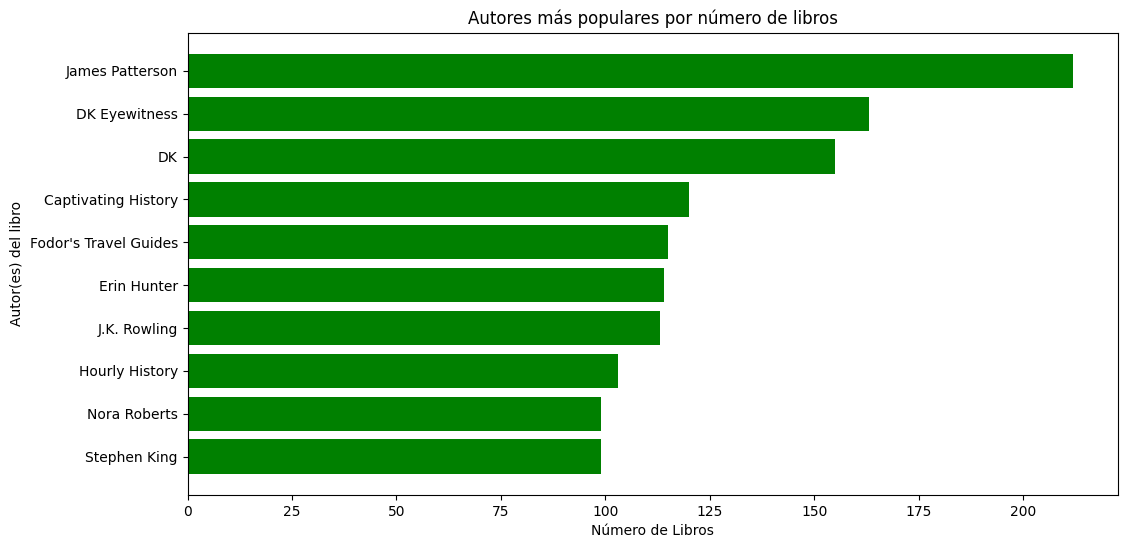

In [24]:
# Mostrar los autores con más libros
top_autores_libros = autores_libros.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_autores_libros.index, top_autores_libros, color='green')
plt.xlabel('Número de Libros')
plt.ylabel('Autor(es) del libro')
plt.title('Autores más populares por número de libros')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el autor con más libros en la parte superior
plt.show()


Los resultados muestran al autor *James Patterson*, que escribe novelas de suspense como el que más novelas tiene

Los dos siguientes y el quinto son guias de viaje 

El cuarto puesto es de libros de historia

*Erin Hunter* es escritora de novela fantastica y juvenil

*J.K. Rowling* tiene la misma tematica que la anterior

El registro 8 pertenece a Biografías y memorias de personajes relevantes

*Nora Roberts* es una escritora de novela romántica

*Stephen King* de misterio


*"¿La mayoría de los registros pertenecen a novelas, no ficción, ciencia ficción, romance u otros géneros?"*

In [25]:
# Contar la frecuencia de cada categoría
frecuencia_categorias = df['Nombre de la Categoria'].value_counts()

# Encontrar la categoría más frecuente
mas_frecuente = frecuencia_categorias.idxmax()
registros_mas_frecuente = frecuencia_categorias.max()

print("La categoría más frecuente es:", mas_frecuente)
print("Número de registros en la categoría más frecuente:", registros_mas_frecuente)


La categoría más frecuente es: Mystery, Thriller & Suspense
Número de registros en la categoría más frecuente: 6272


In [26]:
import plotly.express as px

# Supongamos que 'frecuencia_categorias' es una serie de pandas con las frecuencias de cada categoría

fig = px.bar(frecuencia_categorias, x=frecuencia_categorias.index, y=frecuencia_categorias.values,
             labels={'x': 'Categoría', 'y': 'Número de Registros'}, color=frecuencia_categorias.index)

fig.update_layout(title='Frecuencia de Registros por Categoría', xaxis_title='', yaxis_title='Número de Registros')
fig.update_xaxes(categoryorder='total ascending')

fig.show()


En cuanto a las categorías, las de misterio son las más leídas, sorprende que, tanto Ingeniería y transporte, junto con Ciencia y matemáticas y relaciones personales que son lecturas de no ficción, sean las categorías más demandadas, seguidos de cerca por libros de niños y jovenes. Destacan los libros con temática LGBTQ+ y la poca demanda de Comics

*"Determinar la influencia de las etiquetas "Elección destacada" y "Goodreads Choice" en las ventas de libros."*

In [27]:
# Agrupar por etiquetas y calcular las estadísticas de ventas
eleccion_destacada = df.groupby('Elección destacada')['Número de reseñas'].mean()
goodreads_choice = df.groupby('Goodreads Choice')['Número de reseñas'].mean()


In [28]:
eleccion_destacada

Elección destacada
False     741.594014
True     4195.072407
Name: Número de reseñas, dtype: float64

In [29]:
goodreads_choice

Goodreads Choice
False     816.143383
True     7585.153352
Name: Número de reseñas, dtype: float64

In [30]:
# Comparar estadísticas de ventas para libros con y sin etiquetas
mean_eleccion_destacada = eleccion_destacada.mean()
mean_goodreads_choice = goodreads_choice.mean()


C:\Users\silvi\AppData\Local\Temp\ipykernel_14460\1888087261.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



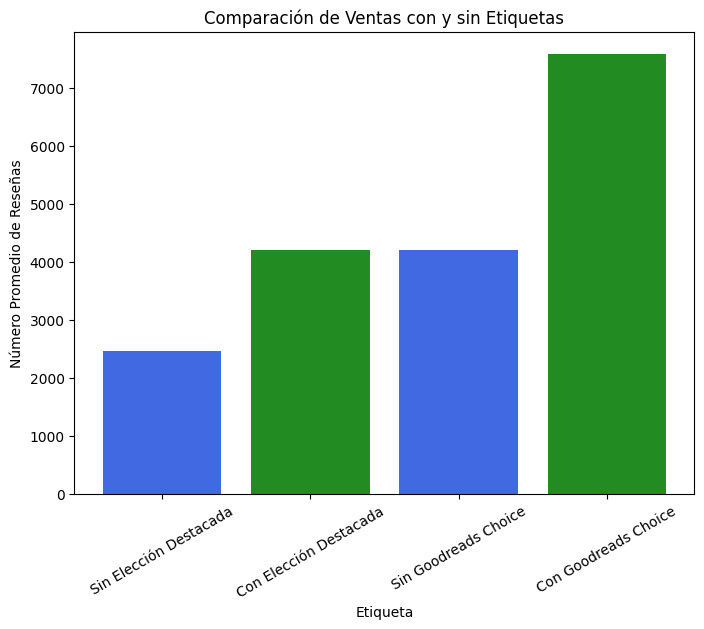

In [31]:
plt.figure(figsize=(8, 6))
etiquetas = ['Sin Elección Destacada', 'Con Elección Destacada', 'Sin Goodreads Choice', 'Con Goodreads Choice']
ventas = [mean_eleccion_destacada, eleccion_destacada[1], mean_goodreads_choice, goodreads_choice[1]]

# Define una lista de colores personalizados
colores = ['royalblue', 'forestgreen', 'royalblue', 'forestgreen']

plt.bar(etiquetas, ventas, color=colores)
plt.xlabel('Etiqueta')
plt.ylabel('Número Promedio de Reseñas')
plt.title('Comparación de Ventas con y sin Etiquetas')
plt.xticks(rotation=30)
plt.show()


Desde luego queda demostrada la influencia de ambas etiquetas, sobre todo la del premio Goodreads Choice marca las ventas.

Goodreads es una comunidad virtual de catalogación de lecturas que, también funciona en España.

En 2011, Goodreads estrenó una de sus funcionalidades más interesantes, un algoritmo para recomendar nuevos libros a los usuarios registrados que hubieran puntuado un mínimo de libros ya leídos. 

*"Titulos más leídos: cuales son los más leídos ¿Hay algunos titulos que se destacan claramente en términos de popularidad?"*

In [32]:
titulos_libros = df.groupby('Titulo del libro')['Autor(es) del libro'].count()
titulos_calificacion_media = df.groupby('Titulo del libro')['Calificación media'].mean()
# Ordenar por número de libros en orden descendente
titulos_libros = titulos_libros.sort_values(ascending=False)


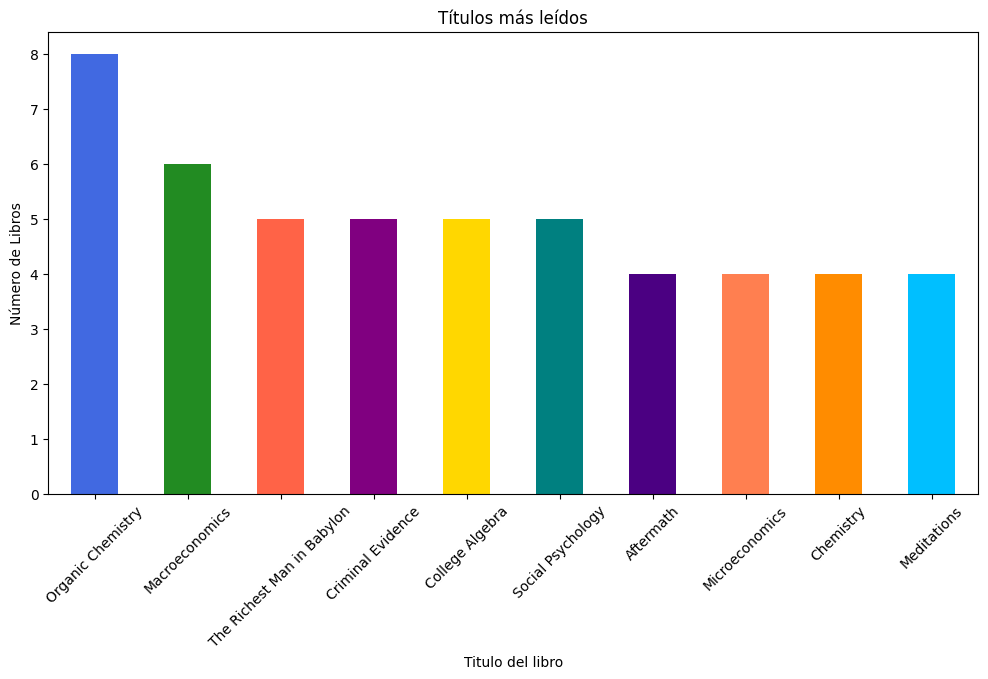

In [33]:
plt.figure(figsize=(12, 6))
top_titulos_libros = titulos_libros.head(10)

# Define una lista de colores personalizados
colores = ['royalblue', 'forestgreen', 'tomato', 'purple', 'gold', 'teal', 'indigo', 'coral', 'darkorange', 'deepskyblue']

top_titulos_libros.plot(kind='bar', color=colores)
plt.xlabel('Titulo del libro')
plt.ylabel('Número de Libros')
plt.title('Títulos más leídos')
plt.xticks(rotation=45)
plt.show()


Increiblemente los titulos más leidos son de Quimica Orgánica y Macroeconomía, tal vez esto sea debido, a que se trata del mes de octubre y puede que las Universidades tengan algo que ver, ya que varios de los titulos son de indole educativa.

*"¿Los libros mejor calificados tienden a venderse más?"*

In [34]:
# Agrupar por calificación promedio y calcular estadísticas de ventas
calificacion_ventas = df.groupby('Calificación media')['Número de reseñas'].mean()


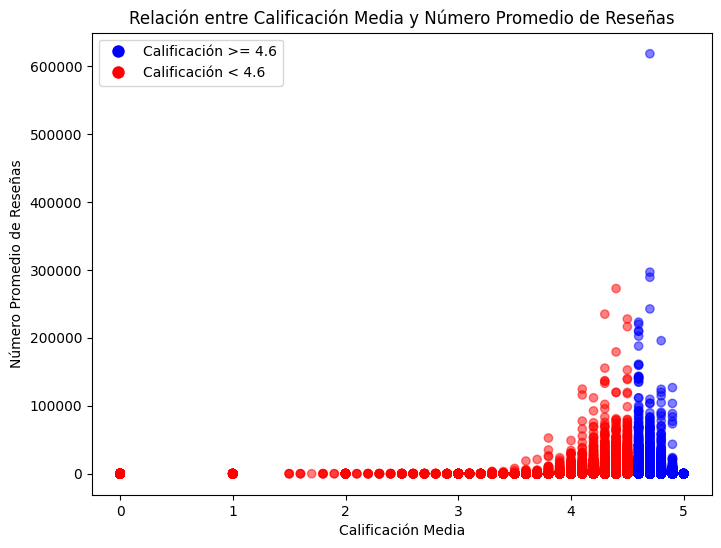

In [35]:

# El umbral para la calificación media es 4.6
umbral = 4.6

# Creamos una nueva columna 'Color' que asigna un color a cada punto basado en la condición
df['Color'] = np.where(df['Calificación media'] >= umbral, 'blue', 'red')

plt.figure(figsize=(8, 6))
plt.scatter(df['Calificación media'], df['Número de reseñas'], c=df['Color'], alpha=0.5)
plt.xlabel('Calificación Media')
plt.ylabel('Número Promedio de Reseñas')
plt.title('Relación entre Calificación Media y Número Promedio de Reseñas')

# Agregar una leyenda para los colores
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Calificación >= 4.6', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Calificación < 4.6', markerfacecolor='red', markersize=10)])

plt.show()


In [36]:
correlacion = df['Calificación media'].corr(df['Número de reseñas'])

print(f"La correlación entre Calificación Media y Número de Reseñas es: {correlacion:.2f}")

La correlación entre Calificación Media y Número de Reseñas es: 0.03


Esto significa que no hay una asociación sólida entre la calificación media y el número de reseñas. La calificación media de un libro no parece tener una influencia significativa en la cantidad de reseñas que recibe, o viceversa. Por lo tanto, no se puede predecir con confianza el número de reseñas de un libro basándose únicamente en su calificación media, ya que la correlación es baja.

Especulando, se puede comentar que, lo normal es poner una calificación al finalizar la lectura, o ni siquiera calificarlo por eso el número tan alto de 0.  Al poner una reseña, es necesario opinar e invertir más tiempo, además de que te haya gustado más o menos  el libro,  implica que tienes algo que decir.


# Conclusiones de las hipótesis

Las conclusiones a las que he llegado después de responder a las hipótesis me han demostrado, que las primeras impresiones no siempre son las más acertadas. 

Los datos han hablado y después del análisis en el que, los autores más populares me hablan de guías de viaje y novela juvenil.
Los géneros quitando las de misterio, thiller y suspense, que son más bien un grupo, no sacan una gran ventaja, a las de no ficción, en las que predominan, las ciencias.

Mi mayor sorpresa reside en los títulos más leídos, la mayoría de ellos manuales y textos educativos, aunque puede ser que tenga que ver con el mes y el comienzo de las clases, no aparece ni una sola novela.

Muy clara se establece la influencia que ejercen las propuestas de Goodreads Choice a los lectores, prácticamente más de la mitad se decantan por esa selección.

Que los libros estén mejor calificados no consigue que se vendan más, según estos datos, es más influyente la recomendación de un algoritmo que las calificaciones y reseñas de los lectores.
